In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dap_zone1 = pd.read_csv('/Users/earl/Documents/WORK/Thesis/data_raw/Zone1.csv').iloc[:, [2]]
dap_zone1.columns.values[0] = 'price'
print(dap_zone1.columns[0])
dap_zone1.head()

price


,price
0,1121.63
1,1065.66
2,1054.63
3,1014.28
4,998.99


In [113]:
start_date = '2022-01-01'
end_date = '2024-01-01'

date_range = pd.date_range(start=start_date, end=end_date, freq='H')
date_range = date_range[:-1]
dap_zone1['datetime'] = date_range
dap_zone1.set_index('datetime', inplace=True)
dap_zone1['price'].head()

/var/folders/w0/mvntm8ws53v7w48x57wdnh9w0000gn/T/ipykernel_67854/1456655080.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='H')


datetime
2022-01-01 00:00:00    1121.63
2022-01-01 01:00:00    1065.66
2022-01-01 02:00:00    1054.63
2022-01-01 03:00:00    1014.28
2022-01-01 04:00:00     998.99
Name: price, dtype: float64

In [114]:
hour_4 = dap_zone1.between_time('04:00', '04:00')
hour_16 = dap_zone1.between_time('16:00', '16:00')

In [115]:
hour_16

,price
datetime,
2022-01-01 16:00:00,1103.72
2022-01-02 16:00:00,1494.65
2022-01-03 16:00:00,1519.53
2022-01-04 16:00:00,1503.17
2022-01-05 16:00:00,1594.09
...,...
2023-12-27 16:00:00,1946.38
2023-12-28 16:00:00,1910.29
2023-12-29 16:00:00,1809.11


In [116]:
hour_4

,price
datetime,
2022-01-01 04:00:00,998.99
2022-01-02 04:00:00,918.58
2022-01-03 04:00:00,967.47
2022-01-04 04:00:00,892.85
2022-01-05 04:00:00,980.12
...,...
2023-12-27 04:00:00,1104.88
2023-12-28 04:00:00,1011.09
2023-12-29 04:00:00,1111.83


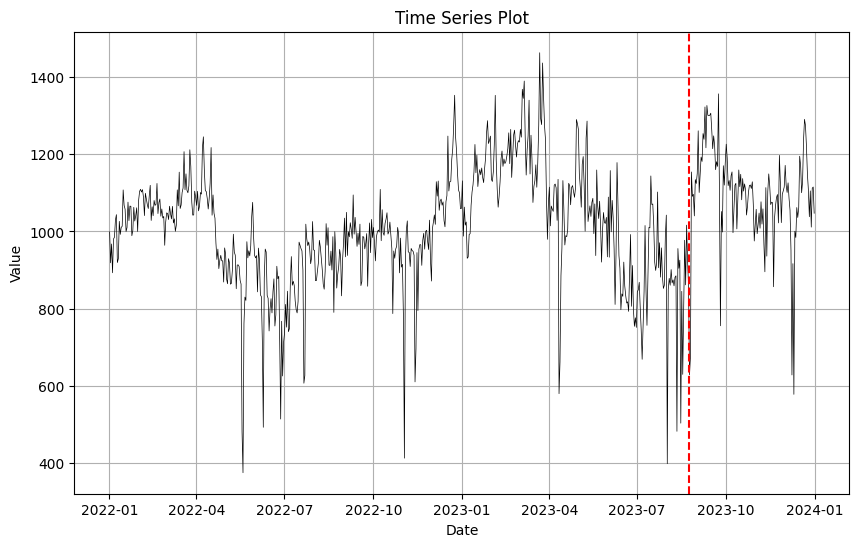

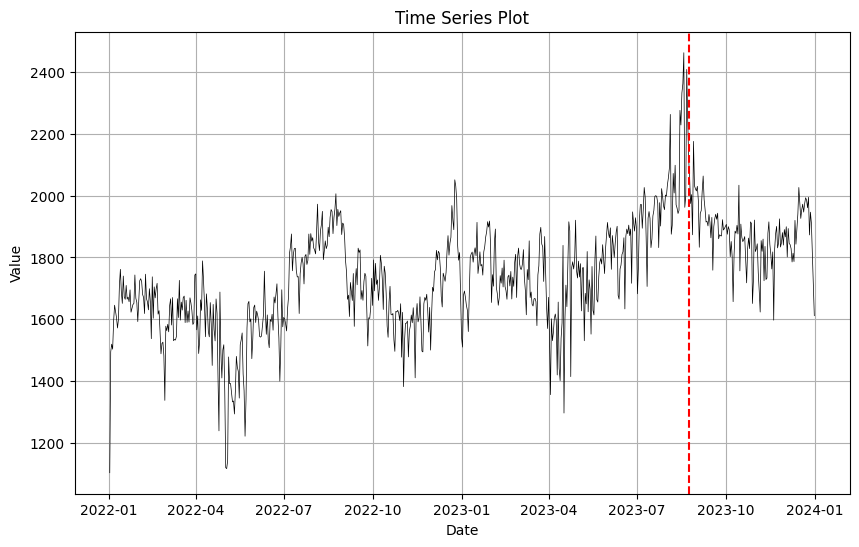

In [117]:
def plot_ts(dataframe, col):
    # Plot the time series data
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.index, dataframe[col], linestyle='-', color='black', linewidth = 0.5)
    plt.axvline(x=pd.to_datetime('2023-08-24'), color='red', linestyle='--', label='Vertical Line')
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plot_ts(hour_4, 'price')
plot_ts(hour_16, 'price')

/var/folders/w0/mvntm8ws53v7w48x57wdnh9w0000gn/T/ipykernel_67854/609673208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_4['log_diff'], hour_16['log_diff'] = np.log(hour_4['price']).diff(), np.log(hour_16['price']).diff()
/var/folders/w0/mvntm8ws53v7w48x57wdnh9w0000gn/T/ipykernel_67854/609673208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_4['log_diff'], hour_16['log_diff'] = np.log(hour_4['price']).diff(), np.log(hour_16['price']).diff()


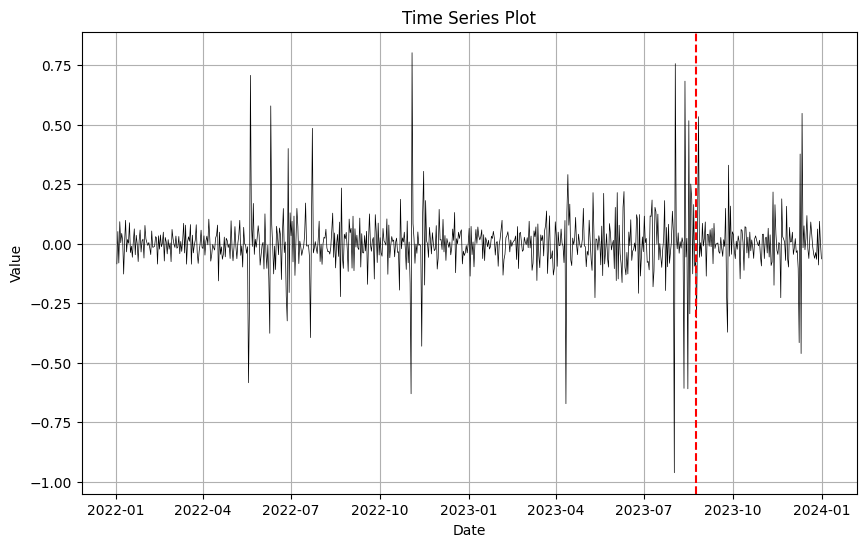

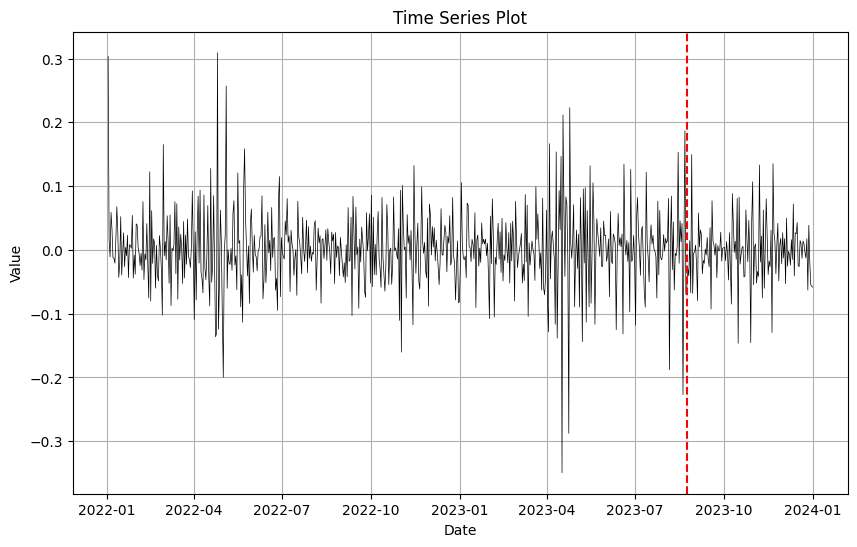

In [118]:
hour_4['log_diff'], hour_16['log_diff'] = np.log(hour_4['price']).diff(), np.log(hour_16['price']).diff()
plot_ts(hour_4, 'log_diff')
plot_ts(hour_16, 'log_diff')

In [119]:
def desc_stats(dataframe, col_name):
    data = dataframe[col_name]
    stats = data.describe(percentiles=[])
    skewness = data.skew()
    kurtosis = data.kurtosis()
    print(stats.round(2))
    print(f'skewness\t {skewness.round(2)}')
    print(f'kurtosis\t {kurtosis.round(2)}')

desc_stats(hour_4, 'price')

count     730.00
mean     1018.64
std       151.43
min       375.12
50%      1027.92
max      1462.67
Name: price, dtype: float64
skewness	 -0.62
kurtosis	 1.6


In [120]:
desc_stats(hour_16, 'price')

count     730.00
mean     1742.97
std       174.39
min      1103.72
50%      1743.42
max      2462.00
Name: price, dtype: float64
skewness	 -0.04
kurtosis	 1.26


In [121]:
hour_4

,price,log_diff
datetime,,
2022-01-01 04:00:00,998.99,NaN
2022-01-02 04:00:00,918.58,-0.083916
2022-01-03 04:00:00,967.47,0.051855
2022-01-04 04:00:00,892.85,-0.080266
2022-01-05 04:00:00,980.12,0.093256
...,...,...
2023-12-27 04:00:00,1104.88,0.062451
2023-12-28 04:00:00,1011.09,-0.088708
2023-12-29 04:00:00,1111.83,0.094978


In [122]:
df_temp4, df_temp16 = pd.read_csv('/Users/earl/Documents/WORK/Thesis/data/df_temp4.csv'), pd.read_csv('/Users/earl/Documents/WORK/Thesis/data/df_temp16.csv')
df_temp4['Date'], df_temp16['Date'] = pd.to_datetime(df_temp4['Date']), pd.to_datetime(df_temp16['Date'])
df_temp4.set_index('Date', inplace=True) 
df_temp16.set_index('Date', inplace=True)

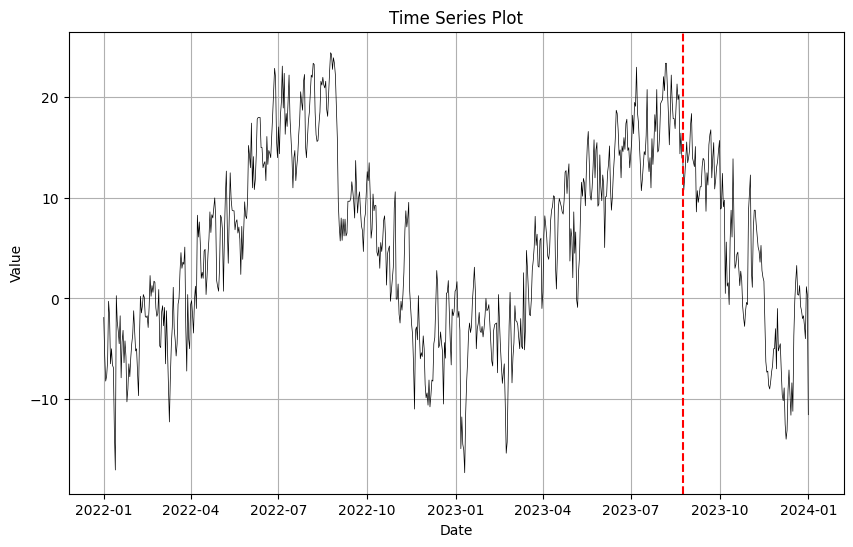

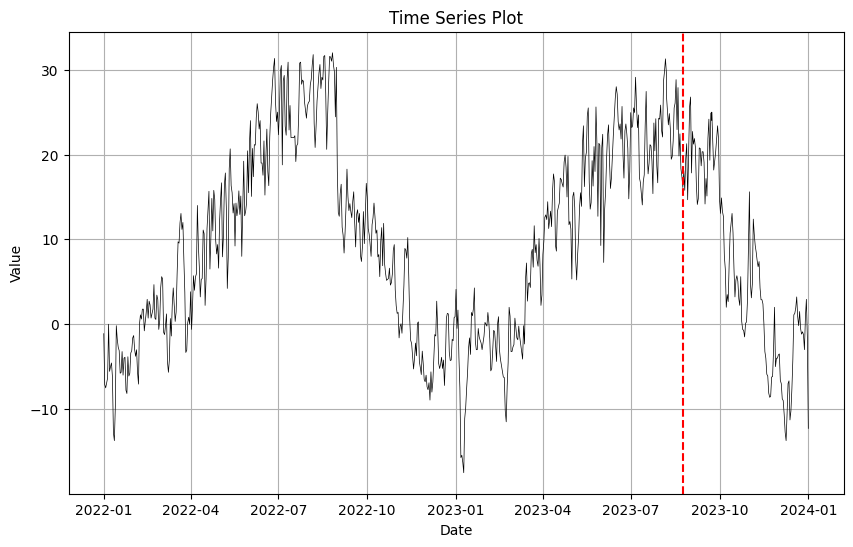

In [123]:
plot_ts(df_temp4, 'Temperature_C')
plot_ts(df_temp16, 'Temperature_C')

In [124]:
# df_temp4, df_temp16 = df_temp4[:-1], df_temp16[:-1]

In [125]:
# df_temp4.to_csv('temp_4.csv'), df_temp16.to_csv('temp_16.csv')

In [126]:
# start_date = '2022-01-01'
# end_date = '2024-01-01'

# dates = pd.date_range(start=start_date, end=end_date, freq='D')
# dates = dates[:-1]

In [127]:
# from datetime import datetime
# saturdays_array = [1 if date.weekday() == 5 else 0 for date in dates]
# sundays_array = [1 if date.weekday() == 6 else 0 for date in dates]
# mondays_array = [1 if date.weekday() == 0 else 0 for date in dates]

In [131]:
# pd.Series(mondays_array).to_csv('mondays.csv', index=False),
# pd.Series(saturdays_array).to_csv('saturdays.csv', index=False),
# pd.Series(sundays_array).to_csv('sundays.csv', index=False)

In [3]:
import pandas as pd 
import numpy as np

tdf = pd.read_csv('/Users/earl/Documents/WORK/Thesis/data/df_temp4.csv', usecols=['Temperature_C'])
tdf['Temperature_F'] = (tdf['Temperature_C'] * 1.8) + 32
tdf['log_temp'] = np.log(tdf['Temperature_F'])
tdf = tdf['log_temp'][1:-1]
tdf.to_csv('log_temp.csv')